In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [ ]:
from tensorflow import keras
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM, Activation
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.utils import pad_sequences

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving energydata_complete.csv to energydata_complete.csv


In [ ]:
df_raw = pd.read_csv("energydata_complete.csv")

df_raw.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
#file_path = 'C:\\Users\\maha.jayapal\\Downloads\\energydata_complete.csv'

#df = pd.read_csv(file_path)

#df.head()

In [ ]:
df_raw.dtypes

,0
date,object
Appliances,int64
lights,int64
T1,float64
RH_1,float64
T2,float64
RH_2,float64
T3,float64
RH_3,float64
T4,float64


In [ ]:
df = df_raw.copy()

In [ ]:
df['Datetime'] = pd.to_datetime(df['date'])

In [ ]:
df.dtypes

,0
date,object
Appliances,int64
lights,int64
T1,float64
RH_1,float64
T2,float64
RH_2,float64
T3,float64
RH_3,float64
T4,float64


In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Datetime
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016-01-11 17:00:00
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016-01-11 17:10:00
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016-01-11 17:20:00
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016-01-11 17:30:00
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016-01-11 17:40:00


In [ ]:
df = df.round(2)

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Datetime
0,2016-01-11 17:00:00,60,30,19.89,47.60,19.2,44.79,19.79,44.73,19.00,...,45.53,6.60,733.5,92.0,7.00,63.00,5.3,13.28,13.28,2016-01-11 17:00:00
1,2016-01-11 17:10:00,60,30,19.89,46.69,19.2,44.72,19.79,44.79,19.00,...,45.56,6.48,733.6,92.0,6.67,59.17,5.2,18.61,18.61,2016-01-11 17:10:00
2,2016-01-11 17:20:00,50,30,19.89,46.30,19.2,44.63,19.79,44.93,18.93,...,45.50,6.37,733.7,92.0,6.33,55.33,5.1,28.64,28.64,2016-01-11 17:20:00
3,2016-01-11 17:30:00,50,40,19.89,46.07,19.2,44.59,19.79,45.00,18.89,...,45.40,6.25,733.8,92.0,6.00,51.50,5.0,45.41,45.41,2016-01-11 17:30:00
4,2016-01-11 17:40:00,60,40,19.89,46.33,19.2,44.53,19.79,45.00,18.89,...,45.40,6.13,733.9,92.0,5.67,47.67,4.9,10.08,10.08,2016-01-11 17:40:00


In [ ]:
# Drop the 'Date' column
df = df.drop(columns=['date'])

# Move the 'Datetime' column to the first position
df = df[['Datetime'] + [col for col in df.columns if col != 'Datetime']]

In [ ]:
df.head()

,Datetime,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.60,19.2,44.79,19.79,44.73,19.00,...,17.03,45.53,6.60,733.5,92.0,7.00,63.00,5.3,13.28,13.28
1,2016-01-11 17:10:00,60,30,19.89,46.69,19.2,44.72,19.79,44.79,19.00,...,17.07,45.56,6.48,733.6,92.0,6.67,59.17,5.2,18.61,18.61
2,2016-01-11 17:20:00,50,30,19.89,46.30,19.2,44.63,19.79,44.93,18.93,...,17.00,45.50,6.37,733.7,92.0,6.33,55.33,5.1,28.64,28.64
3,2016-01-11 17:30:00,50,40,19.89,46.07,19.2,44.59,19.79,45.00,18.89,...,17.00,45.40,6.25,733.8,92.0,6.00,51.50,5.0,45.41,45.41
4,2016-01-11 17:40:00,60,40,19.89,46.33,19.2,44.53,19.79,45.00,18.89,...,17.00,45.40,6.13,733.9,92.0,5.67,47.67,4.9,10.08,10.08


In [ ]:
df.isna().sum()

,0
Datetime,0
Appliances,0
lights,0
T1,0
RH_1,0
T2,0
RH_2,0
T3,0
RH_3,0
T4,0


In [ ]:
df.shape

(19735, 29)

In [ ]:
#convert datetime to epoch/unix time
df['unix'] = df['Datetime'].apply(lambda x: x.timestamp())

# Linear Regression with ph 10 and mu 0.9

In [ ]:
ts = pd.DataFrame(df.unix)
ys = pd.DataFrame(df.Appliances)

ph = 10 * 60 #10 minutes
data_resolution = ts.unix.diff().mean()
ph_index = int(ph / data_resolution) #ph/data resolution (how many timesteps is our ph?)
mu = 0.9

#let's limit the number of samples in our model to 5000 just for speed
n_s = 5000

# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)

In [ ]:
# At every iteration of the for loop, a new data sample is acquired
for i in range(2, n_s+1):  # Start out with 2 leading datapoints
    # Get x and y data "available" for our prediction
    ts_tmp = ts[0:i]
    ys_tmp = ys[0:i]
    ns = len(ys_tmp)

    weights = np.ones(ns) * mu
    for k in range(ns):
        # Adjust weights to be downweighted according to their timestep away from our prediction
        weights[k] = weights[k] ** k
    weights = np.flip(weights, 0)

    # Perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)

    # Store model coefficients and intercepts to compute prediction
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_

    # Use ph to make the model prediction according to the prediction time
    tp = ts.iloc[i-1, 0] + ph
    yp = m_tmp * tp + q_tmp


    tp_pred[i-2] = tp
    yp_pred[i-2] = yp.item() if isinstance(yp, np.ndarray) else yp  # Extract scalar safely


In [ ]:
print("MSE is", mse(ys['Appliances'][ph_index:5000+ph_index-1],yp_pred))

MSE is 5738.95873072593


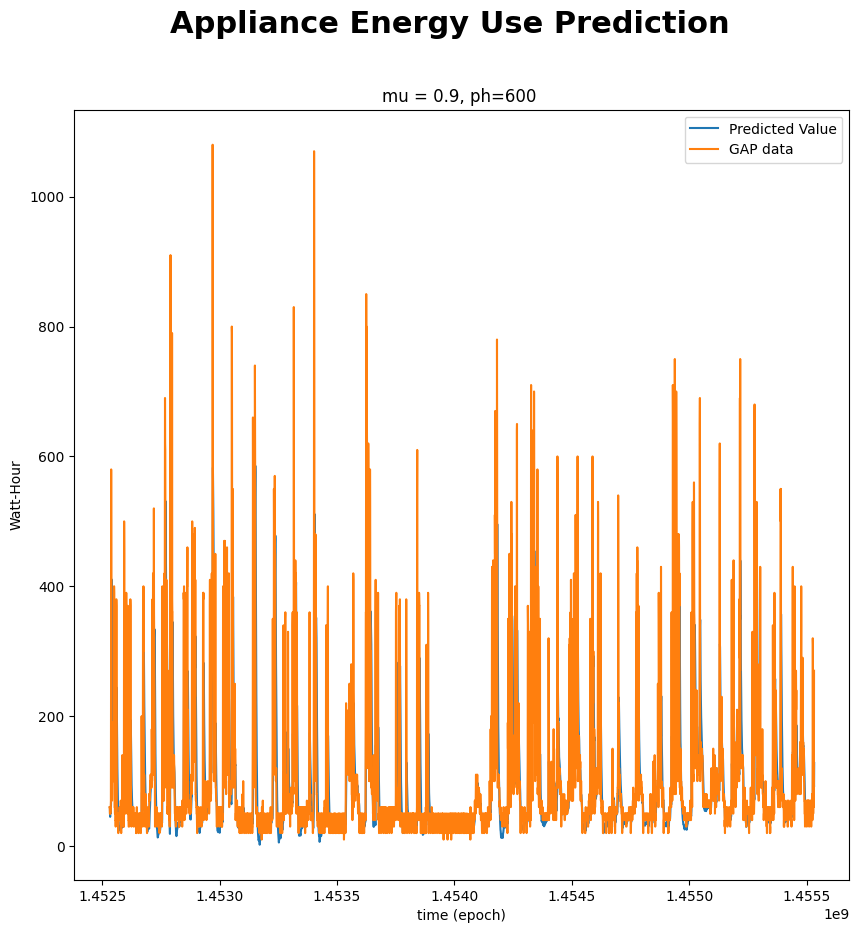

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Appliance Energy Use Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred, yp_pred, label='Predicted Value')
ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('Watt-Hour')
ax.legend()

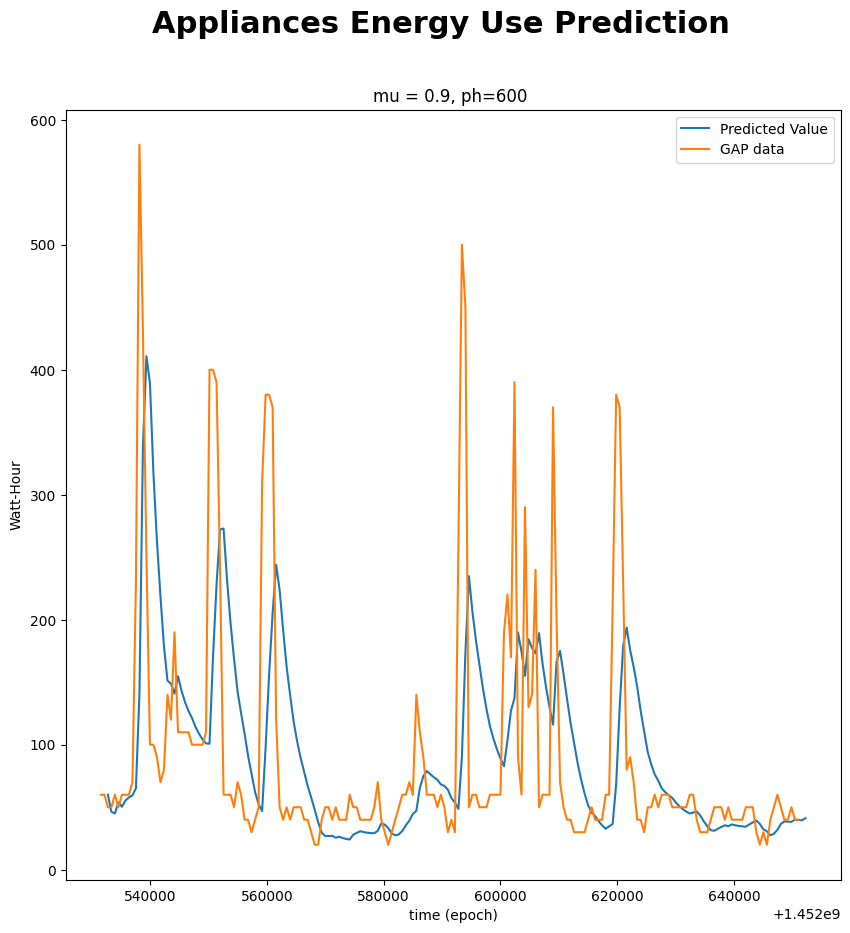

In [ ]:
#Plot first 200 data points/predictions
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Appliances Energy Use Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))

ax.plot(tp_pred[0:200], yp_pred[0:200], label='Predicted Value')
ax.plot(ts.iloc[0:200,0], ys.iloc[0:200,0], label='GAP data')

ax.set_xlabel('time (epoch)')
ax.set_ylabel('Watt-Hour')
ax.legend()

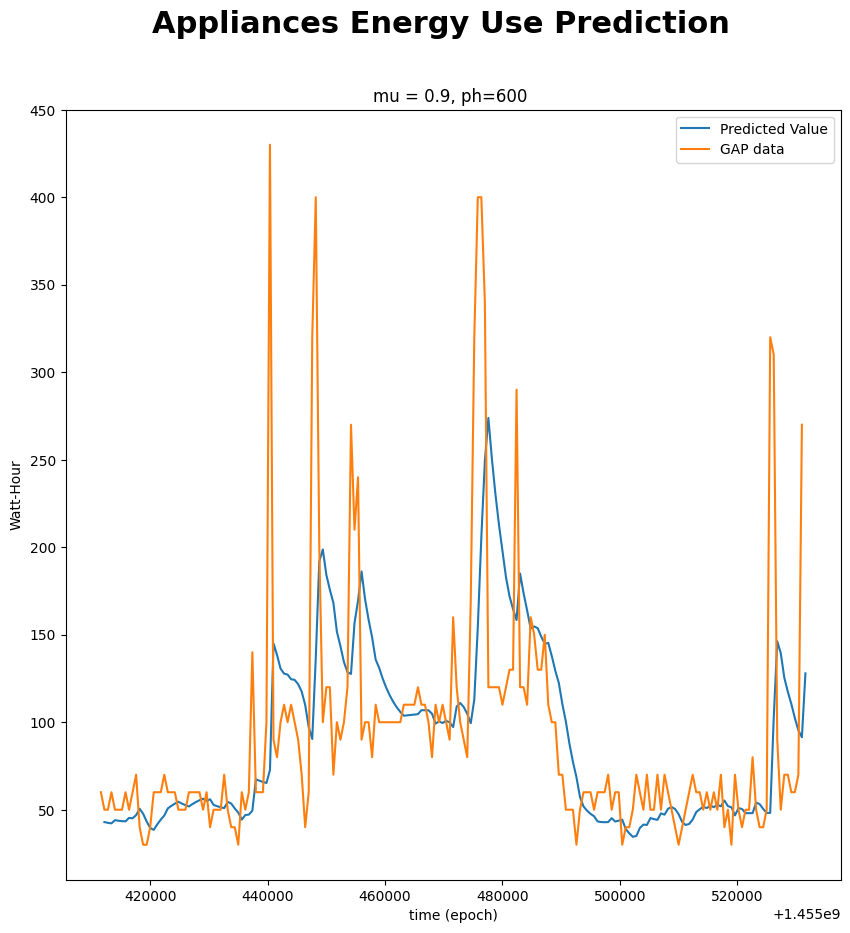

In [ ]:
#Plot last 200 data points/predictions
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Appliances Energy Use Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))

ax.plot(tp_pred[-200:], yp_pred[-200:], label='Predicted Value')
ax.plot(ts.iloc[n_s-200:n_s,0], ys.iloc[n_s-200:n_s,0], label='GAP data')

ax.set_xlabel('time (epoch)')
ax.set_ylabel('Watt-Hour')
ax.legend()

# Linear Regression with ph 5 minutes and mu 0.9

In [ ]:
ts = pd.DataFrame(df.unix)
ys = pd.DataFrame(df.Appliances)

ph = 5 * 60 #5 minutes
data_resolution = ts.unix.diff().mean()
ph_index = int(ph / data_resolution) #ph/data resolution (how many timesteps is our ph?)
mu = 0.9

#let's limit the number of samples in our model to 5000 just for speed
n_s = 5000

# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)

In [ ]:
# At every iteration of the for loop a new data sample is acquired
for i in range(2, n_s+1):# start out with 2 leading datapoints
    #get x and y data "available" for our prediction
    ts_tmp = ts[0:i]
    ys_tmp = ys[0:i]
    ns = len(ys_tmp)


    weights = np.ones(ns)*mu
    for k in range(ns):
        #adjust weights to be downweighted according to their timestep away from our prediction
        weights[k] = weights[k]**k
    weights = np.flip(weights, 0)

    #perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)

    #store model coefficients and intercepts to compute prediction
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_

    #use ph to make the model prediction according to the prediction time
    tp = ts.iloc[i-1,0] + ph
    yp = m_tmp*tp + q_tmp


    tp_pred[i-2] = tp
    yp_pred[i-2] = yp.item() if isinstance(yp, np.ndarray) else yp  # Extract scalar safely

In [ ]:
print("MSE is", mse(ys['Appliances'][ph_index:5000+ph_index-1],yp_pred))

MSE is 4344.243731287086


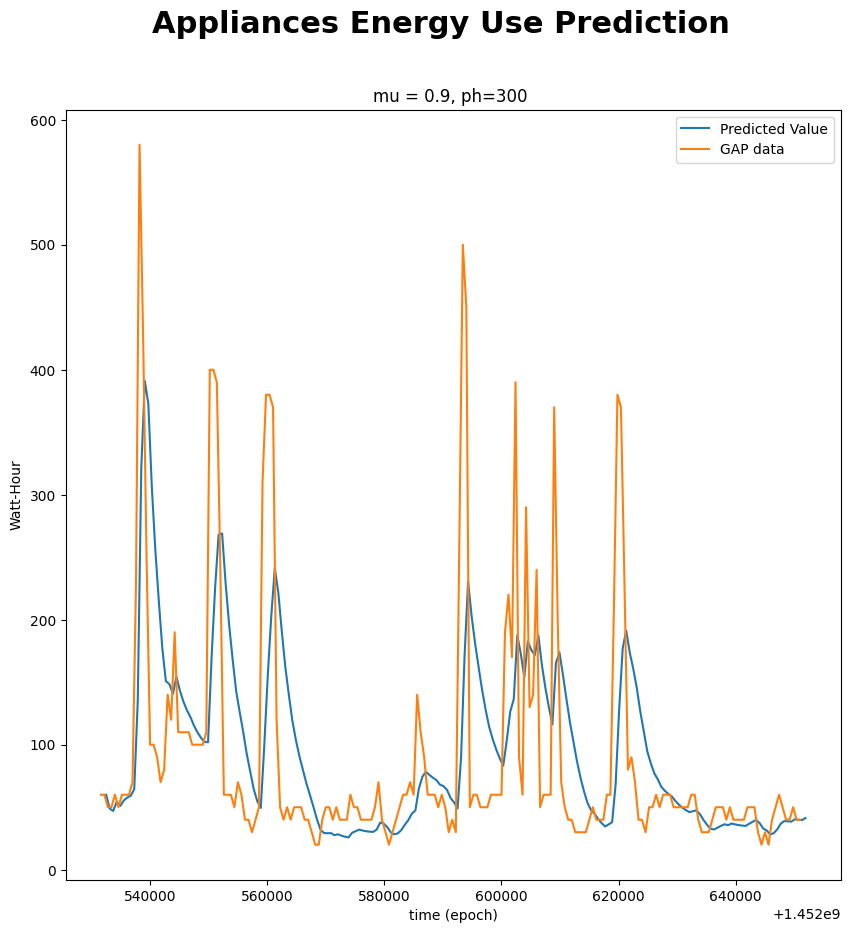

In [ ]:
#Plot first 200 data points/predictions
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Appliances Energy Use Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))

ax.plot(tp_pred[0:200], yp_pred[0:200], label='Predicted Value')
ax.plot(ts.iloc[0:200,0], ys.iloc[0:200,0], label='GAP data')

ax.set_xlabel('time (epoch)')
ax.set_ylabel('Watt-Hour')
ax.legend()

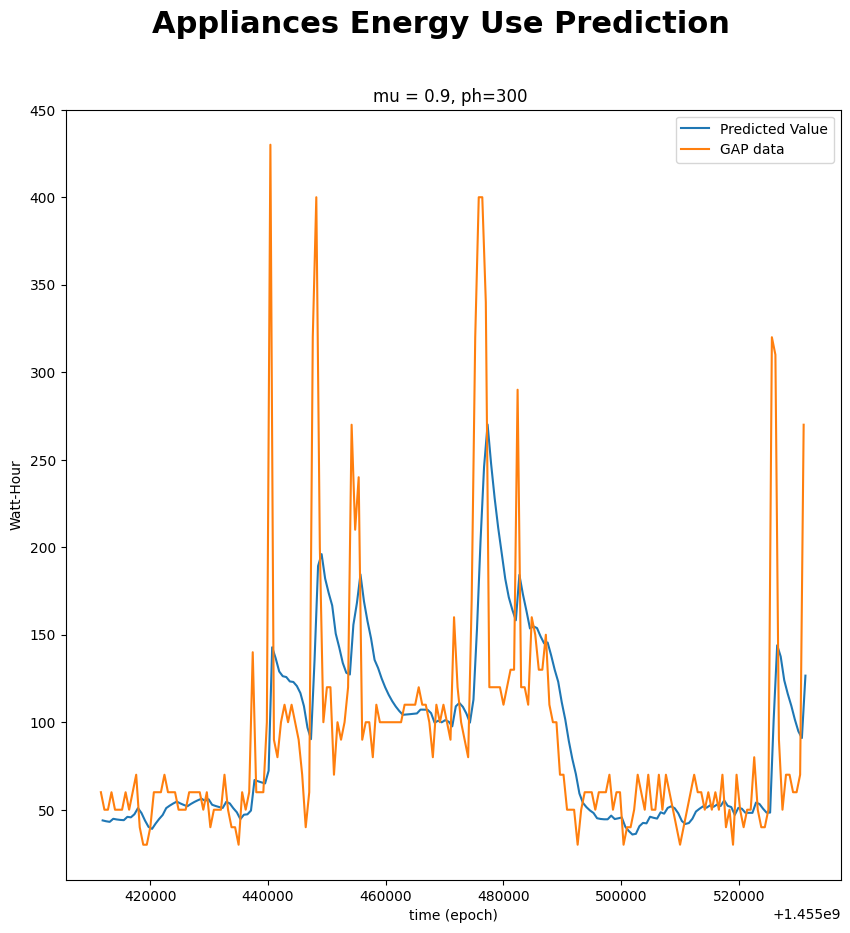

In [ ]:
#Plot last 200 data points/predictions
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Appliances Energy Use Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))

ax.plot(tp_pred[-200:], yp_pred[-200:], label='Predicted Value')
ax.plot(ts.iloc[n_s-200:n_s,0], ys.iloc[n_s-200:n_s,0], label='GAP data')

ax.set_xlabel('time (epoch)')
ax.set_ylabel('Watt-Hour')
ax.legend()

# Linear regression with time and outside temperature

In [41]:
#add outside temperature to the x-variables in our dataset
ts = df[['unix', 'T_out']]
ys = df[['Appliances']]

ph = 10 * 60 #10 minutes
data_resolution = ts.unix.diff().mean()
ph_index = int(ph / data_resolution) #ph/data resolution (how many timesteps is our ph?)
mu = 0.9

#let's limit the number of samples in our model to 5000 just for speed
n_s = min(5000, len(ts))

#arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)

In [42]:
# Loop through the data to make predictions
for i in range(2, n_s + 1):  # Start with 2 leading datapoints
    # Get x and y data "available" for our prediction
    ts_tmp = ts.iloc[:i]  # Includes 'unix' and 'Voltage' as features
    ys_tmp = ys.iloc[:i]  # Corresponding target values

    # Initialize weights
    weights = np.ones(len(ys_tmp)) * mu
    for k in range(len(ys_tmp)):
        weights[k] = weights[k] ** k
    weights = np.flip(weights, 0)

    # Perform linear regression
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)

    # Use ph to make the model prediction
    tp_unix = ts.iloc[i - 1, 0] + ph  # Add ph (in seconds) to the current Unix time
    tp_voltage = ts.iloc[i - 1, 1]  # Voltage value at the prediction time
    yp = model_tmp.coef_[0][0] * tp_unix + model_tmp.coef_[0][1] * tp_voltage + model_tmp.intercept_[0]

    # Store predictions
    tp_pred[i - 2] = tp_unix
    yp_pred[i - 2] = yp



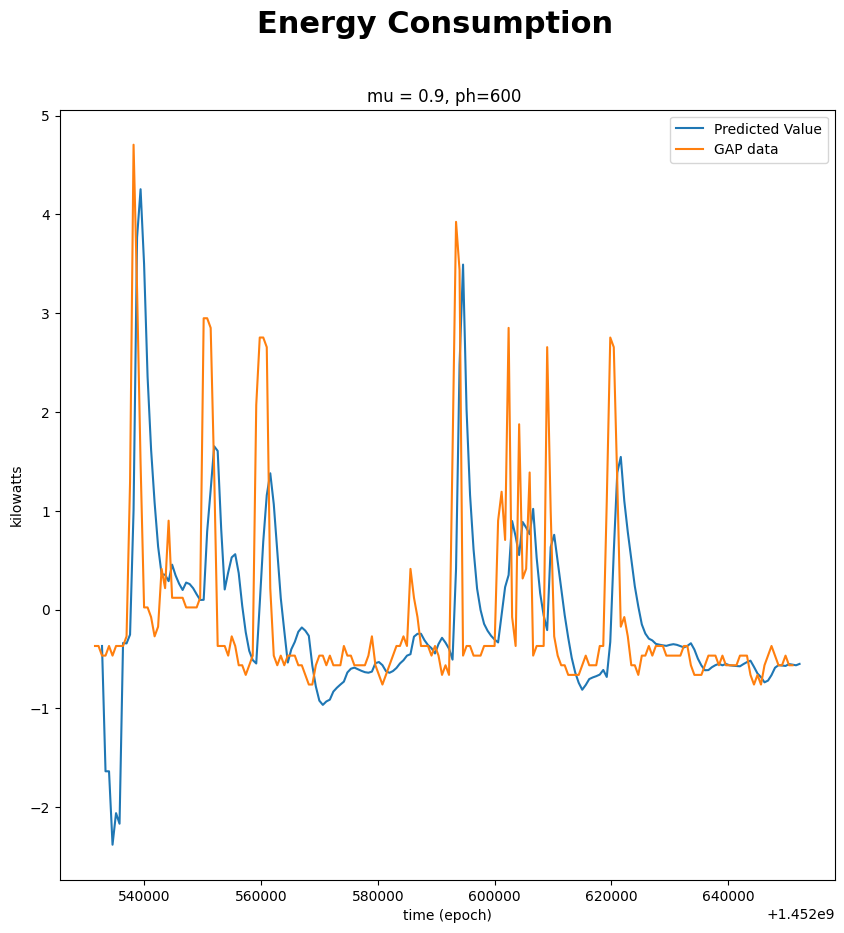

In [44]:
#Plot first 200 data points/predictions for the expanded dataset
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Energy Consumption', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))

ax.plot(tp_pred[0:200], yp_pred[0:200], label='Predicted Value')
ax.plot(ts.iloc[0:200,0], ys.iloc[0:200,0], label='GAP data')

ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

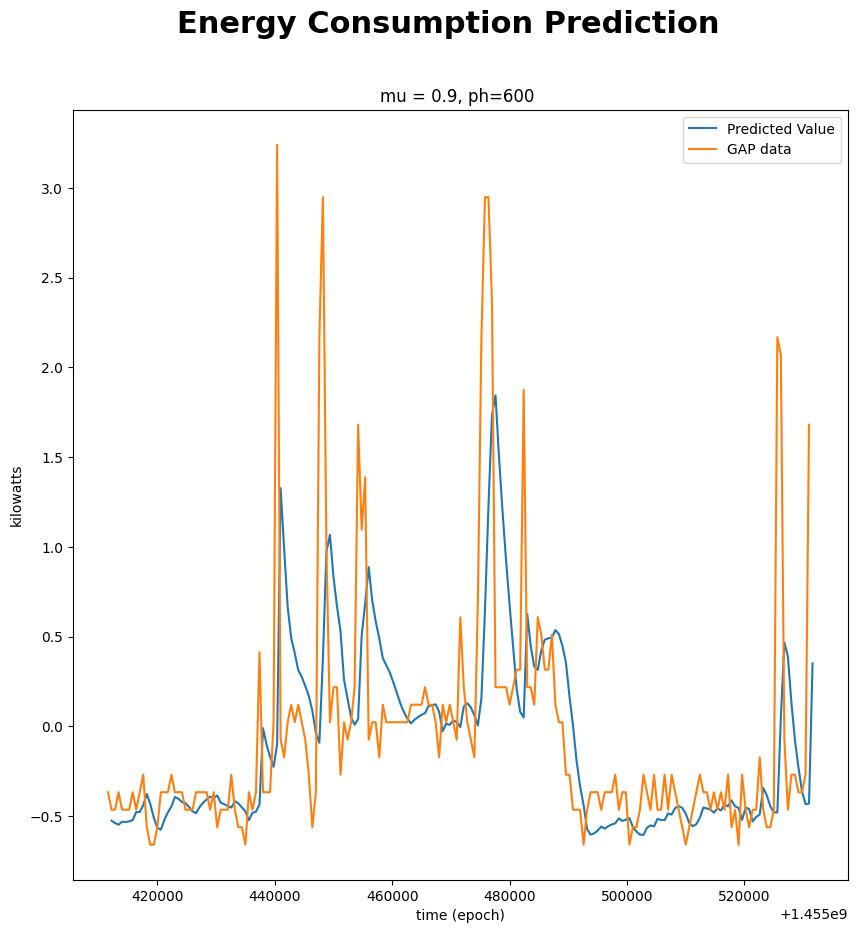

In [45]:
#Plot last 200 data points/predictions for the expanded data

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Energy Consumption Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))

ax.plot(tp_pred[-200:], yp_pred[-200:], label='Predicted Value')
ax.plot(ts.iloc[n_s-200:n_s,0], ys.iloc[n_s-200:n_s,0], label='GAP data')

ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

In [ ]:
#Calculate MSE of predictions for the expanded data

print("MSE is", mse(ys['Appliances'][ph_index:5000+ph_index-1],yp_pred))

MSE is 4895.448515922478


# **Model Performance Report - MSE:**
**Time Series Prediction**

Model with Time and Temperature: MSE = 4895.45

Model with Only Time (μ = 0.9, ph = 5 min): MSE = 4344.24

Model with Only Time (μ = 0.9, ph = 10 min): MSE = 5738.96

The model using only time with ph = 5 minutes yielded the lowest MSE, indicating better predictive accuracy compared to other variations. Increasing the prediction horizon to 10 minutes led to a significant increase in error, highlighting the challenge of longer-term forecasts. The inclusion of temperature did not improve performance, suggesting that time alone may be a stronger predictor in this dataset. Further tuning of parameters or adding more relevant features could enhance model accuracy.

# LSTM

In [ ]:
# Normalize the data
scaler = StandardScaler()
feat_cols = ['Appliances']
df[feat_cols] = scaler.fit_transform(df[feat_cols])

# Split the data into training and validation sets
train_size = int(0.8 * len(df))
train_df = df.iloc[:train_size].reset_index(drop=True)  # First 80% for training
val_df = df.iloc[train_size:].reset_index(drop=True)    # Last 20% for validation

In [ ]:
# Sequence parameters
seq_length = 60  # Increased sequence length
ph = 5

# Prepare training sequences
seq_arrays = []
seq_labs = []

for i in range(len(train_df) - seq_length - ph):
    seq = train_df[feat_cols].iloc[i:i + seq_length].values
    label = train_df[feat_cols].iloc[i + seq_length + ph - 1].values
    seq_arrays.append(seq)
    seq_labs.append(label)

seq_arrays = np.array(seq_arrays, dtype=np.float32)
seq_labs = np.array(seq_labs, dtype=np.float32).reshape(-1)

assert seq_arrays.shape == (len(train_df) - seq_length - ph, seq_length, len(feat_cols))
assert seq_labs.shape == (len(train_df) - seq_length - ph,)

In [ ]:

# Build the LSTM model
model_path = 'LSTM_model1.keras'
nb_features = len(feat_cols)
nb_out = 1

model = Sequential()
model.add(LSTM(units=50, input_shape=(seq_length, nb_features), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=25, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=nb_out))
model.add(Activation('linear'))

optimizer = keras.optimizers.Adam(learning_rate=0.005)  # Adjusted learning rate
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

print(model.summary())

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
model_checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model
history = model.fit(
    seq_arrays, seq_labs,
    epochs=100,
    batch_size=500,
    validation_split=0.1,
    verbose=2,
    callbacks=[lr_scheduler, early_stopping, model_checkpoint]
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 25)                  │           7,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              26 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,026 (70.41 KB)

 Trainable params: 18,026 (70.41 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100

Epoch 1: val_loss improved from inf to 0.67038, saving model to LSTM_model1.keras
29/29 - 13s - 450ms/step - loss: 0.8859 - mse: 0.8859 - val_loss: 0.6704 - val_mse: 0.6704 - learning_rate: 0.0050
Epoch 2/100

Epoch 2: val_loss improved from 0.67038 to 0.65801, saving model to LSTM_model1.keras
29/29 - 9s - 305ms/step - loss: 0.8642 - mse: 0.8642 - val_loss: 0.6580 - val_mse: 0.6580 - learning_rate: 0.0050
Epoch 3/100

Epoch 3: val_loss did not improve from 0.65801
29/29 - 9s - 300ms/step - loss: 0.8616 - mse: 0.8616 - val_loss: 0.6612 - val_mse: 0.6612 - learning_rate: 0.0050
Epoch 4/100

Epoch 4: val_loss did not improve from 0.65801
29/29 - 11s - 365ms/step - loss: 0.8573 - mse: 0.8573 - val_loss: 0.6646 - val_mse: 0.6646 - learning_rate: 0.0050
Epoch 5/100

Epoch 5: val_loss improved from 0.65801 to 0.64808, saving model to LSTM_model1.keras
29/29 - 10s - 339ms/step - loss: 0.8591 - mse: 0.8591 - val_loss: 0.6481 - val_mse: 0.6481 - learning_rate: 0.0050
Epoch 6/1

122/122 - 2s - 14ms/step - loss: 0.5735 - mse: 0.5735

MSE: 0.5735245943069458
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step


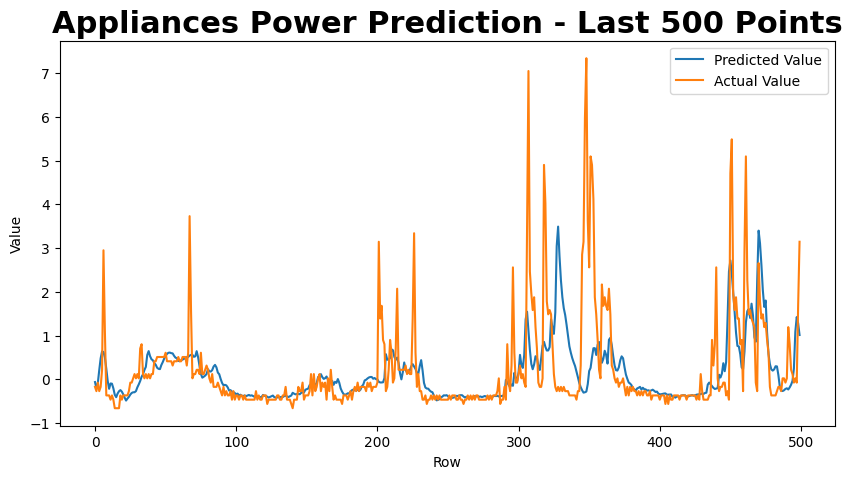

In [ ]:
# Prepare validation sequences
val_arrays = []
val_labs = []

for i in range(seq_length, len(val_df) - ph):
    seq = val_df[feat_cols].iloc[i - seq_length:i].values
    label = val_df[feat_cols].iloc[i + ph - 1].values
    val_arrays.append(seq)
    val_labs.append(label)

val_arrays = np.array(val_arrays, dtype=np.float32)
val_labs = np.array(val_labs, dtype=np.float32).reshape(-1)

# Evaluate the model
scores_test = model.evaluate(val_arrays, val_labs, verbose=2)
print('\nMSE: {}'.format(scores_test[1]))

# Predictions
y_pred_test = model.predict(val_arrays)
y_true_test = val_labs

# Plot the results
fig_verify = plt.figure(figsize=(10, 5))
plt.plot(y_pred_test[-500:], label='Predicted Value')
plt.plot(y_true_test[-500:], label='Actual Value')
plt.title('Appliances Power Prediction - Last 500 Points', fontsize=22, fontweight='bold')
plt.ylabel('Value')
plt.xlabel('Row')
plt.legend()
plt.show()
fig_verify.savefig("model_regression_verify.png")
